In [112]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [113]:
#Importing functions from the above library
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split # to partition data into training and testing
from sklearn.tree import  DecisionTreeClassifier # to build the classification model
from sklearn.tree import DecisionTreeRegressor   # to build the regression model
from sklearn import tree #Build the decision tree
from sklearn.metrics import classification_report # gives the report with accurarcy, F1 score, etc
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [114]:
# Upload dataset - heart_disease.xlsx
#Reading our dataset
df = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [115]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [117]:
df['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


In [118]:
# Renaming the target variable num to stages of heart disease with 0 being no and 1 being least and 4 being the highest
# Rename column - num
df.rename(columns={'num':'stages'},inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,stages
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [119]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [120]:
df['oldpeak'].value_counts()

,count
oldpeak,
0.0,358
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
1.4,15


In [121]:
# Replacing the null values with mean imputation
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)

In [122]:
corr = df.corr(numeric_only = True)
corr

,age,trestbps,chol,fbs,thalch,oldpeak,stages
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.232718,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.152162,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.028744,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.022756,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.128728,-0.323058
oldpeak,0.232718,0.152162,0.028744,0.022756,-0.128728,1.000000,0.416580
stages,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.416580,1.000000


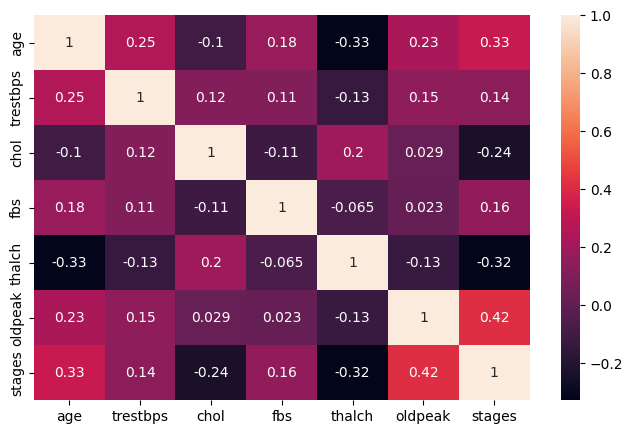

In [123]:
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True)
plt.show()

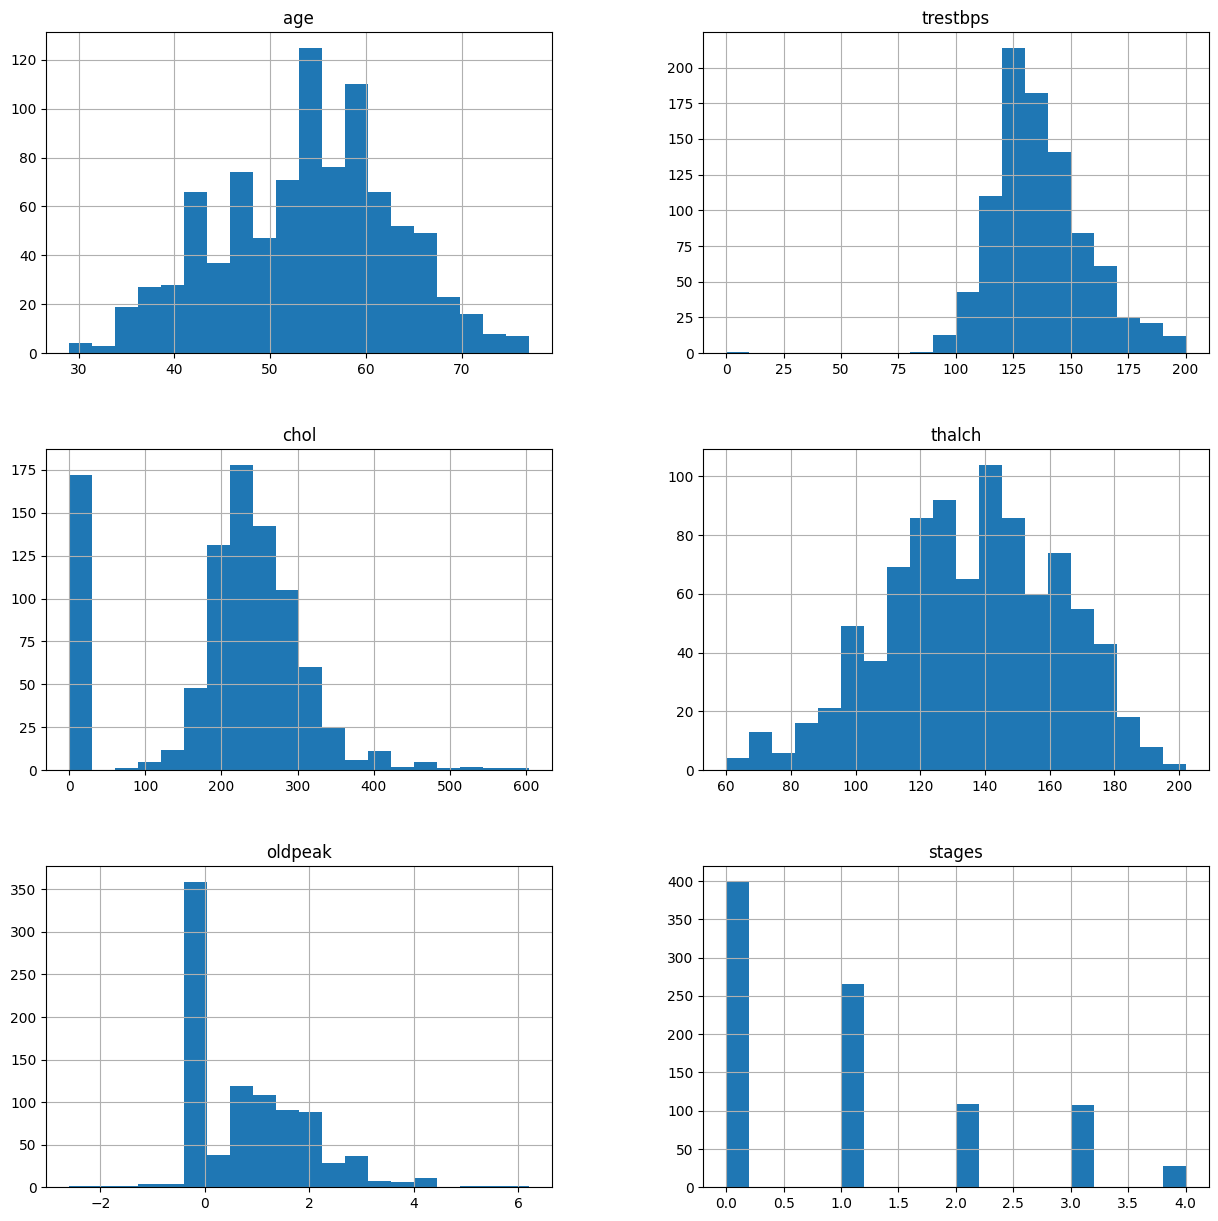

In [124]:
df.hist(figsize=(15,15),bins=20)
plt.show()

In [125]:
# Checking for duplicated values
df.duplicated().sum()

1

In [126]:
df.drop_duplicates(inplace=True)

In [127]:
df.duplicated().sum()

0

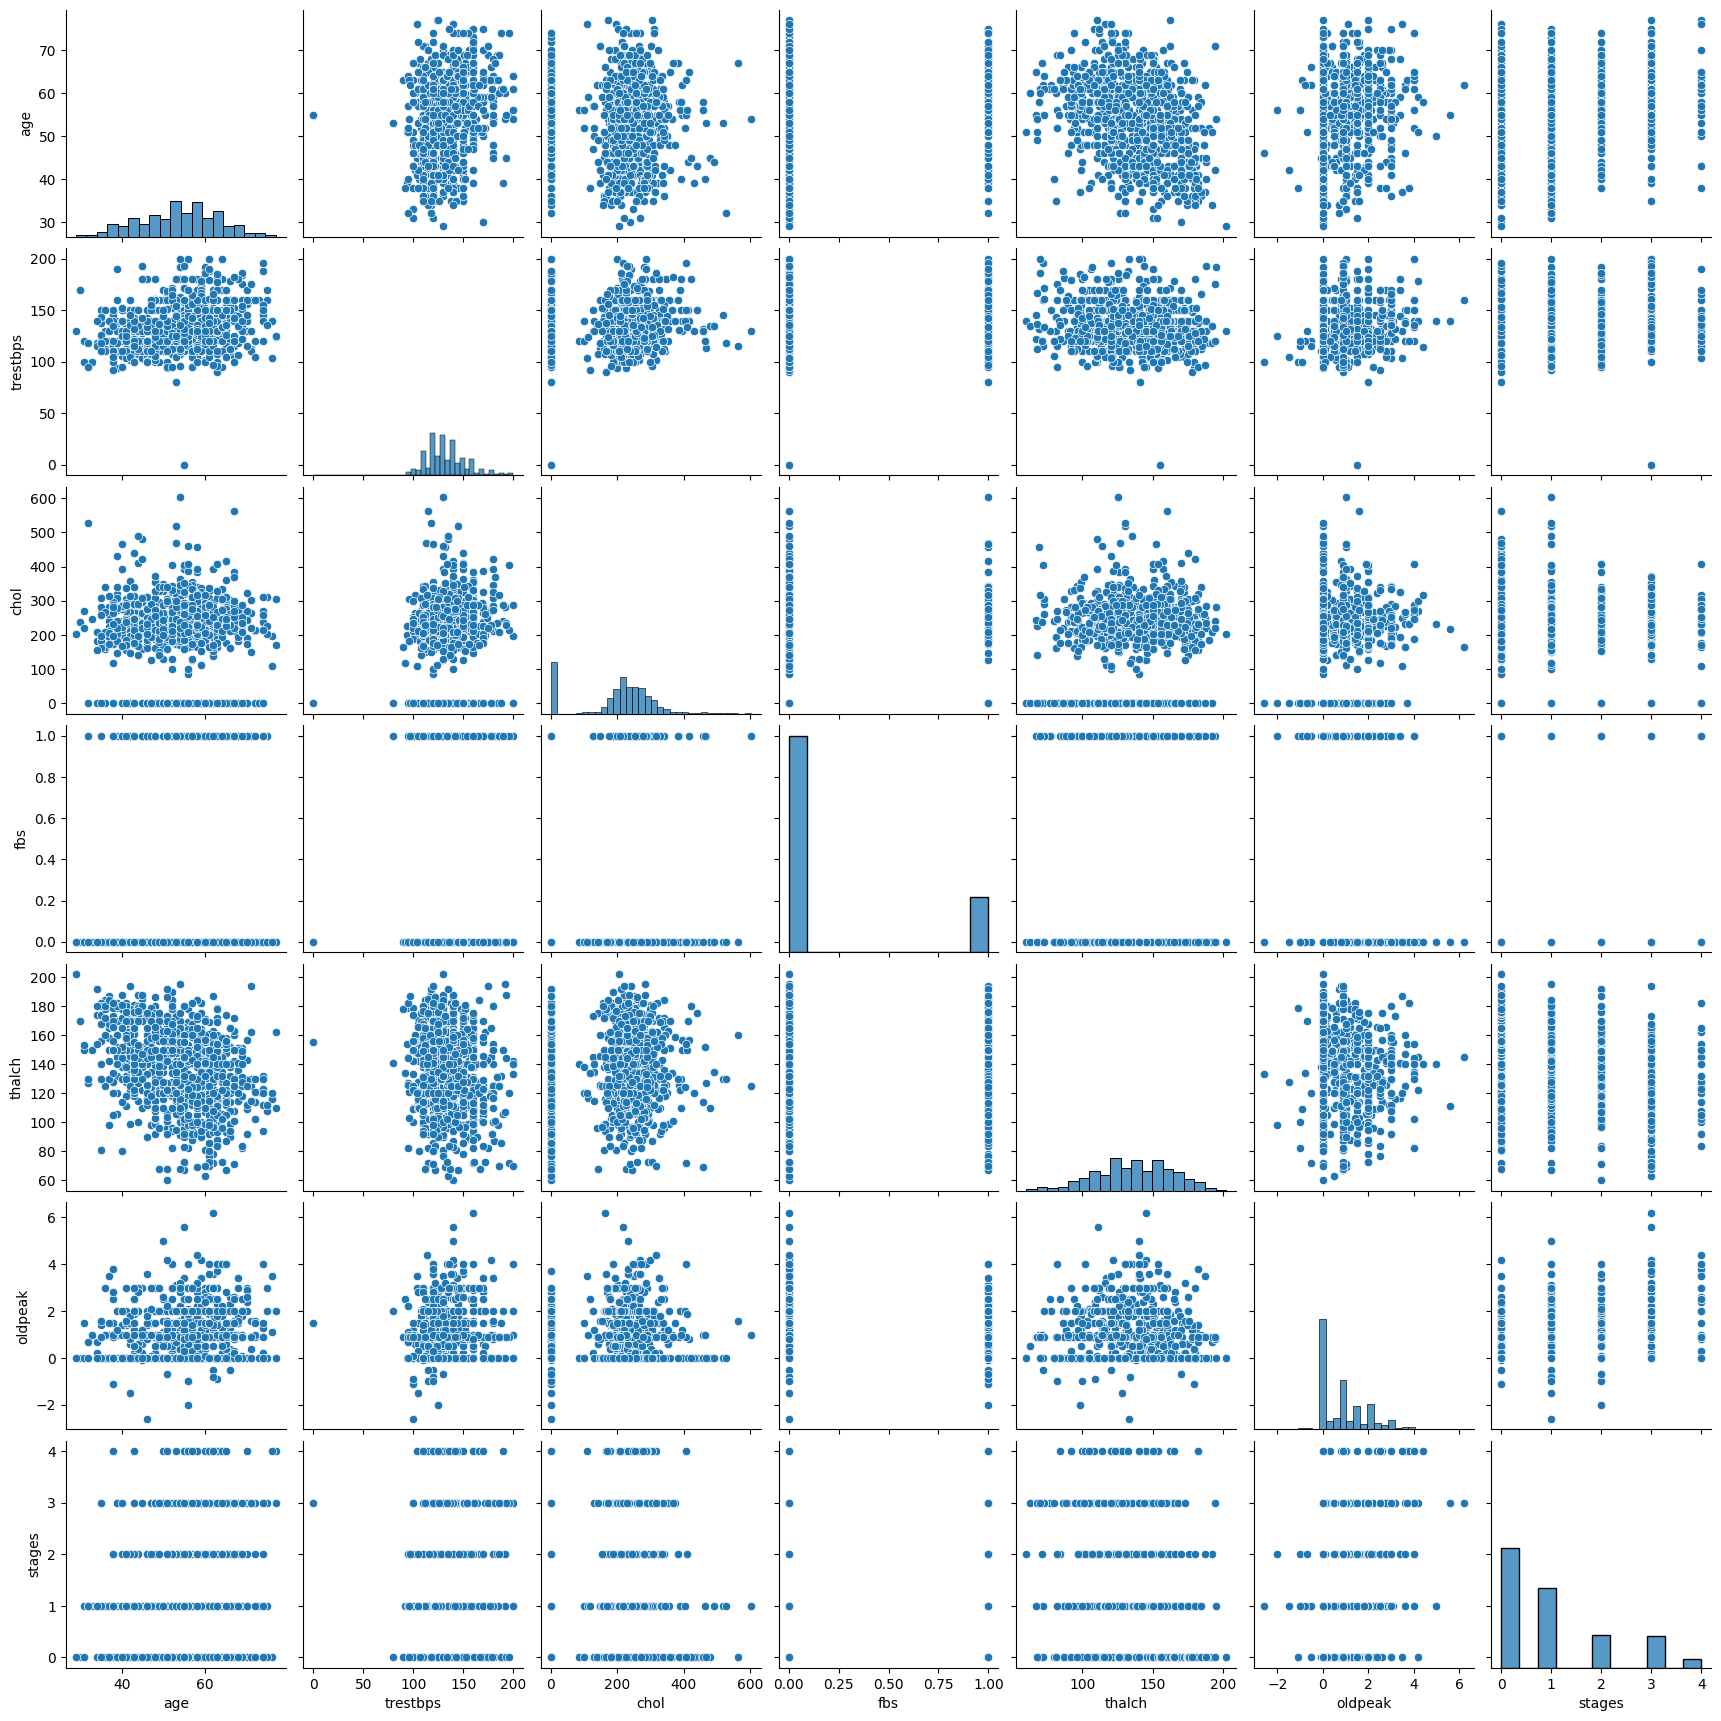

In [128]:
sns.pairplot(df)
plt.show()

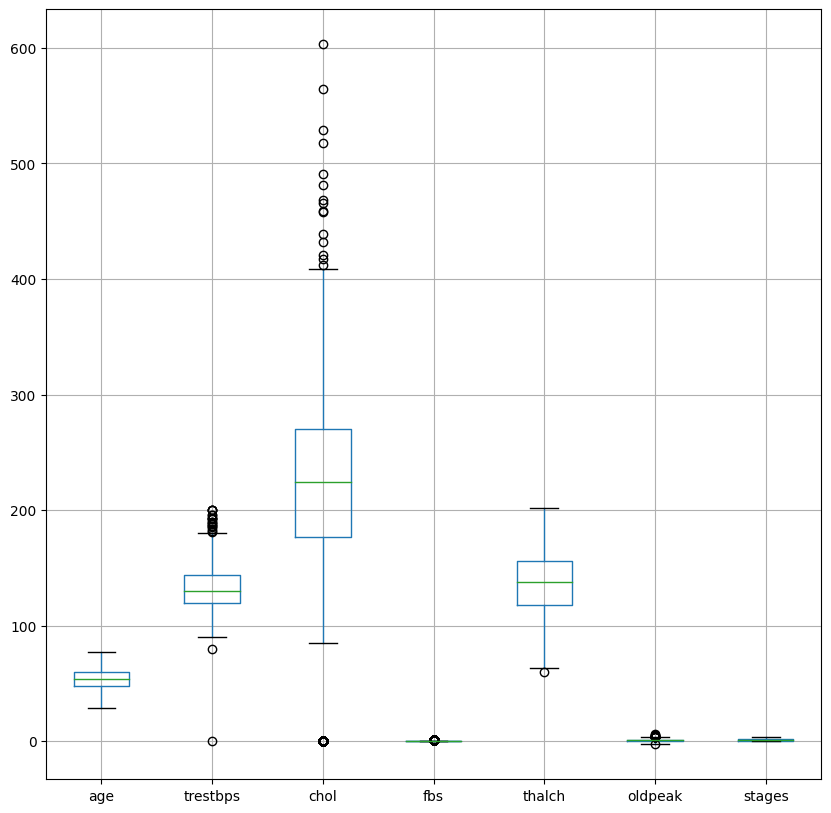

In [129]:
# Checking for outliers using box plots
df.boxplot(figsize=(10,10))
plt.show()

In [130]:
# Dummification of the data using label encoding
LE = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype(str)
        df[i] = LE.fit_transform(df[i])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,stages
0,63,1,3,145,233,True,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,False,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,False,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,False,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,False,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,1,1.500000,2,2,4
904,62,1,0,166,170,False,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,False,0,123,3,2.500000,0,1,4
906,56,1,2,144,208,True,2,105,2,0.891253,0,0,4


In [131]:
df['fbs'] = LE.fit_transform(df['fbs'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,stages
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,3,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,0,4


In [132]:
df['stages'].value_counts()

,count
stages,
0,399
1,265
2,108
3,107
4,28


In [133]:
'''# Standardizing the data only on the numeric columns
ss = StandardScaler()

df[['age','trestbps','chol','thalch','oldpeak']] = ss.fit_transform(df[['age','trestbps','chol','thalch','oldpeak']])
df'''

"# Standardizing the data only on the numeric columns\nss = StandardScaler()\n\ndf[['age','trestbps','chol','thalch','oldpeak']] = ss.fit_transform(df[['age','trestbps','chol','thalch','oldpeak']])\ndf"

In [134]:
# Dividing the data into independant variable and target variable
X = df.drop('stages',axis=1)
y = df['stages']

In [135]:
# Performing train test split on the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test

(     age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
 84    42    1   1       120   295    0        1     162      1      0.0   
 10    30    0   3       170   237    0        2     170      1      0.0   
 616   58    1   2       160   211    1        2      92      1      0.0   
 250   41    1   0       104     0    0        2     111      1      0.0   
 478   64    0   0       142   276    0        1     140      3      1.0   
 ..   ...  ...  ..       ...   ...  ...      ...     ...    ...      ...   
 106   63    0   2       135   252    0        0     172      1      0.0   
 270   37    0   1       120   260    0        1     130      1      0.0   
 861   55    1   0       172   260    0        1      73      1      2.0   
 435   57    1   1       154   232    0        0     164      1      0.0   
 102   60    0   3       150   240    0        1     171      1      0.9   
 
      slope  thal  
 84       2     1  
 10       0     0  
 616      2     0  
 250  

In [136]:
# Applying the decision tree classifier on the training data
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

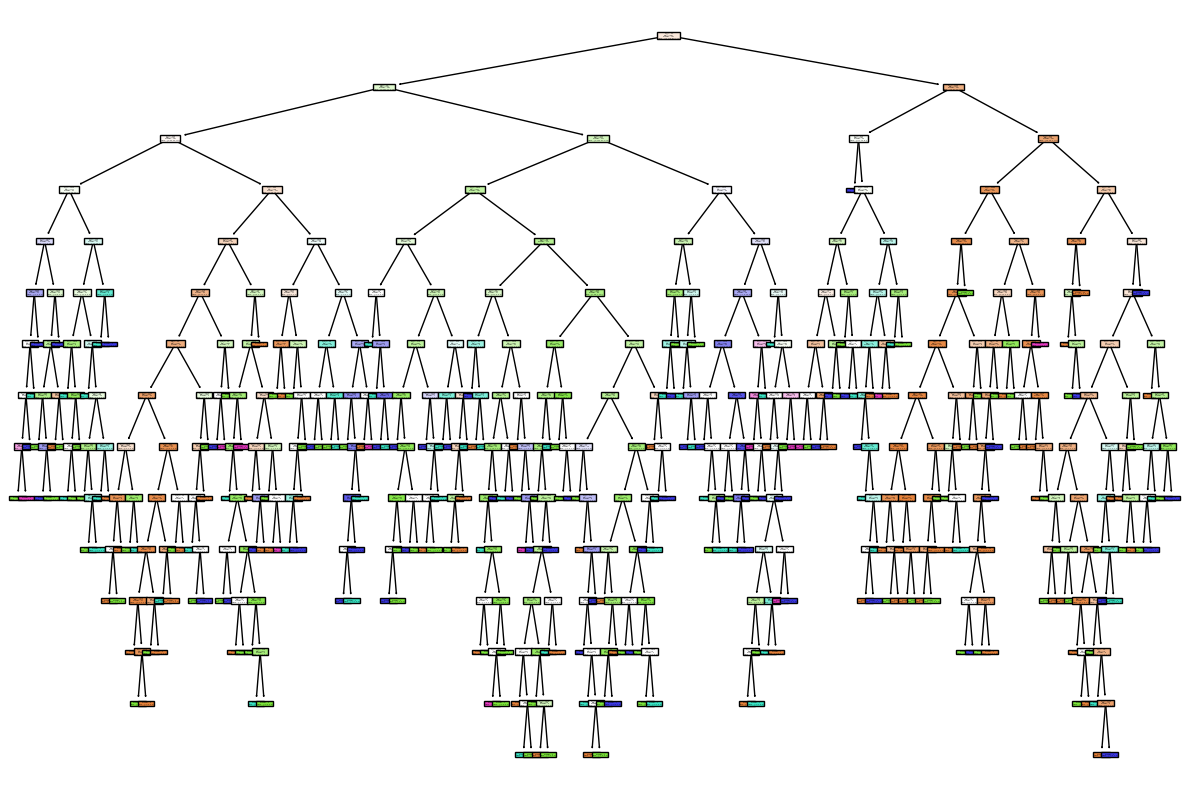

In [137]:
# Visualizing the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled = True)
plt.show()

In [138]:
# reducing the depth of the decision tree
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

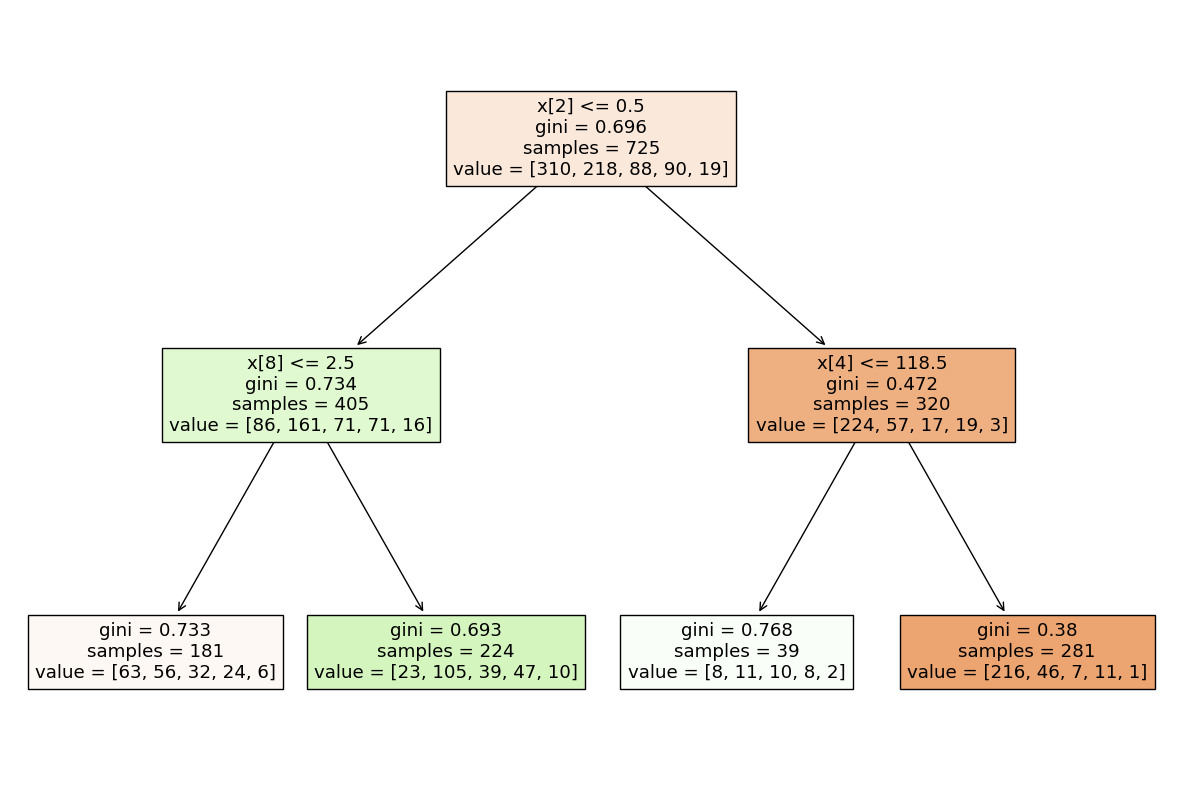

In [139]:
# Plotting the tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled = True)
plt.show()

In [140]:
# Predicting on the testing dataset
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0])

In [141]:
# Preparing a classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        89
           1       0.43      0.55      0.48        47
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         9

    accuracy                           0.57       182
   macro avg       0.21      0.29      0.24       182
weighted avg       0.43      0.57      0.49       182



In [142]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro')) # Specify averaging method
print("Recall (macro):", recall_score(y_test, y_pred, average='macro')) # Specify averaging method
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro')) # Specify averaging method


Accuracy: 0.5714285714285714
Precision (macro): 0.214171521474055
Recall (macro): 0.28591919674874494
F1 Score (macro): 0.24486772486772485


In [143]:
#Hyperparameter tuning using Grid Search CV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_depth=3)


In [146]:
#Evaluating the tuned model
y_pred_tuned = best_estimator.predict(X_test)
print(classification_report(y_test,y_pred_tuned))


              precision    recall  f1-score   support

           0       0.72      0.87      0.79        89
           1       0.42      0.57      0.49        47
           2       0.00      0.00      0.00        20
           3       0.09      0.06      0.07        17
           4       0.00      0.00      0.00         9

    accuracy                           0.58       182
   macro avg       0.25      0.30      0.27       182
weighted avg       0.47      0.58      0.52       182



In [149]:
print("\nAccuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision (macro):", precision_score(y_test, y_pred_tuned, average = 'macro')) # Specify averaging method
print("Recall (macro):", recall_score(y_test, y_pred_tuned, average = 'macro')) # Specify averaging method
print("F1 Score (macro):", f1_score(y_test, y_pred_tuned, average = 'macro')) # Specify averaging method


Accuracy: 0.5769230769230769
Precision (macro): 0.24648205182667798
Recall (macro): 0.2996920307687981
F1 Score (macro): 0.26872586872586873


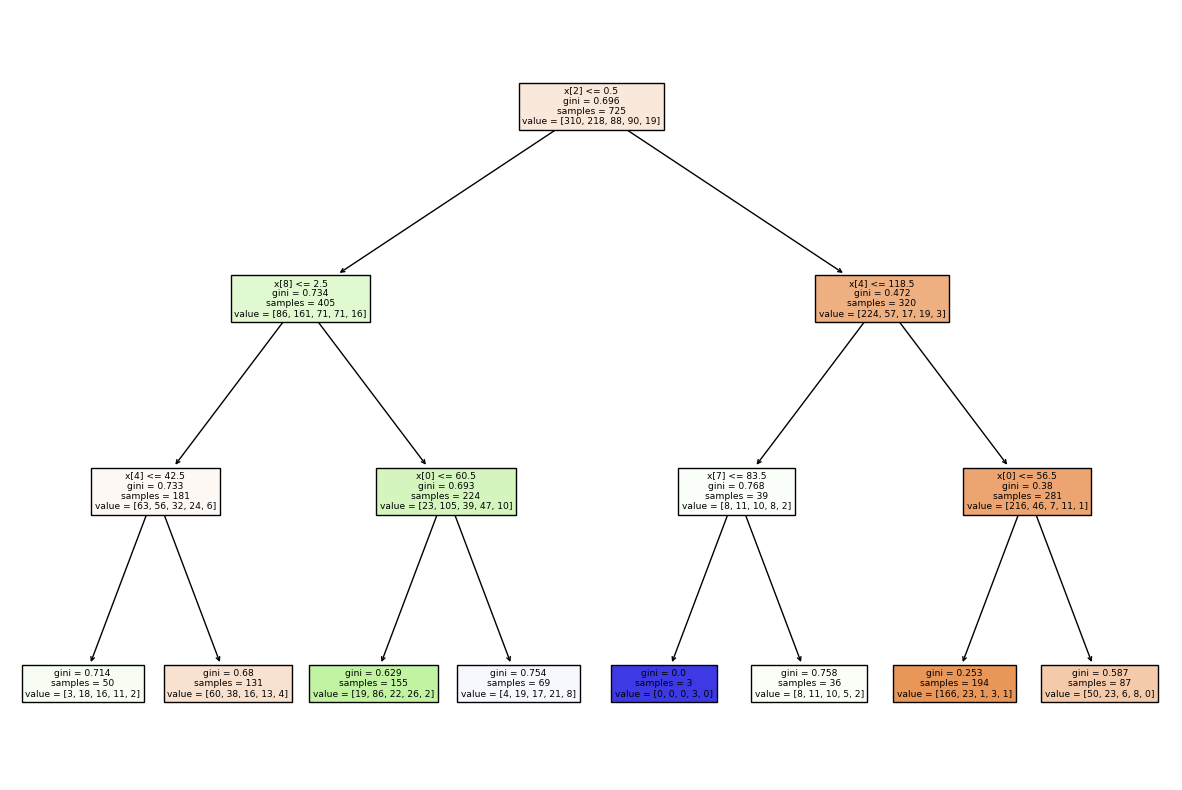

In [150]:
# Visualizing the tree of the tuned model
plt.figure(figsize=(15,10))
tree.plot_tree(best_estimator,filled = True)
plt.show()

Q1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common hyperparameters of decision tree models and their effects on the model's performance include:

1. Criterion: 'gini' tends to create binary splits, while 'entropy' might result in more complex splits. Both criteria aim to reduce impurity but may produce slightly different trees. The choice can affect the depth and shape of the tree.
2. Max Depth: Higher values prevent the model from creating nodes that only contain a few samples, thus reducing overfitting. Low values allow the tree to grow deeper, which can lead to overfitting.
3. Min Samples Leaf: Ensures that leaf nodes have a certain number of samples, which can help reduce overfitting. Higher values increase the bias but reduce variance.
4. Min Samples Split: Higher values prevent the model from creating nodes that only contain a few samples, thus reducing overfitting. Low values allow the tree to grow deeper, which can lead to overfitting.
5. Max Features: Using fewer features can reduce overfitting by making the model less sensitive to small variations in the data. It can also speed up the training process.
6. Max Leaf Nodes: Limits the complexity of the model by restricting the number of leaf nodes, which helps prevent overfitting.
7. Min Impurity Decrease: Higher values can prevent overfitting by ensuring that only splits that significantly improve model performance are made.


Q2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding and One-Hot Encoding are two methods used to convert categorical data into a numerical format that machine learning algorithms can utilize.

1. Label Encoding -
  • Converts each unique category value in a column into a numerical label.
  • Each category is assigned a unique integer value. For example, if you have a column with the categories ["Red", "Green", "Blue"], Label Encoding might convert this to [0, 1, 2].
  • Simple and fast to implement. Does not significantly increase the dimensionality of the data.
  • Can introduce ordinal relationships where there are none. For instance, 2 > 1 > 0 implies an order, which might not be meaningful for categories like colors or names. Not suitable for categorical features with no intrinsic ordering.

2. One-Hot Encoding -
  • Converts each category value into a new binary column (or feature). Each category is represented by a binary vector with a 1 in the position of the category and 0 elsewhere.
  • For a column with ["Red", "Green", "Blue"], One-Hot Encoding would create three new columns: Red, Green, Blue. If an observation is "Red", the binary vector would be [1, 0, 0], for "Green" it would be [0, 1, 0], and so on.
  • Does not introduce any ordinal relationships among categories.
  • Can significantly increase the dimensionality of the dataset, especially if the categorical feature has a large number of unique values. This can lead to the "curse of dimensionality". More memory-intensive due to the creation of multiple new columns.